In [28]:
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS

#importlib.reload(dendrocat)
W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'








In [29]:
def plot_masked(ax, image, threshold=1e-5,vmin=0,vmax=1e-3,cmap='inferno'):
    mask = np.ma.masked_where(image<3*threshold,image)
    print(mask)
    ax.imshow(mask, origin='lower', vmin=vmin,vmax=vmax,cmap=plt.get_cmap(cmap))
    
    

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


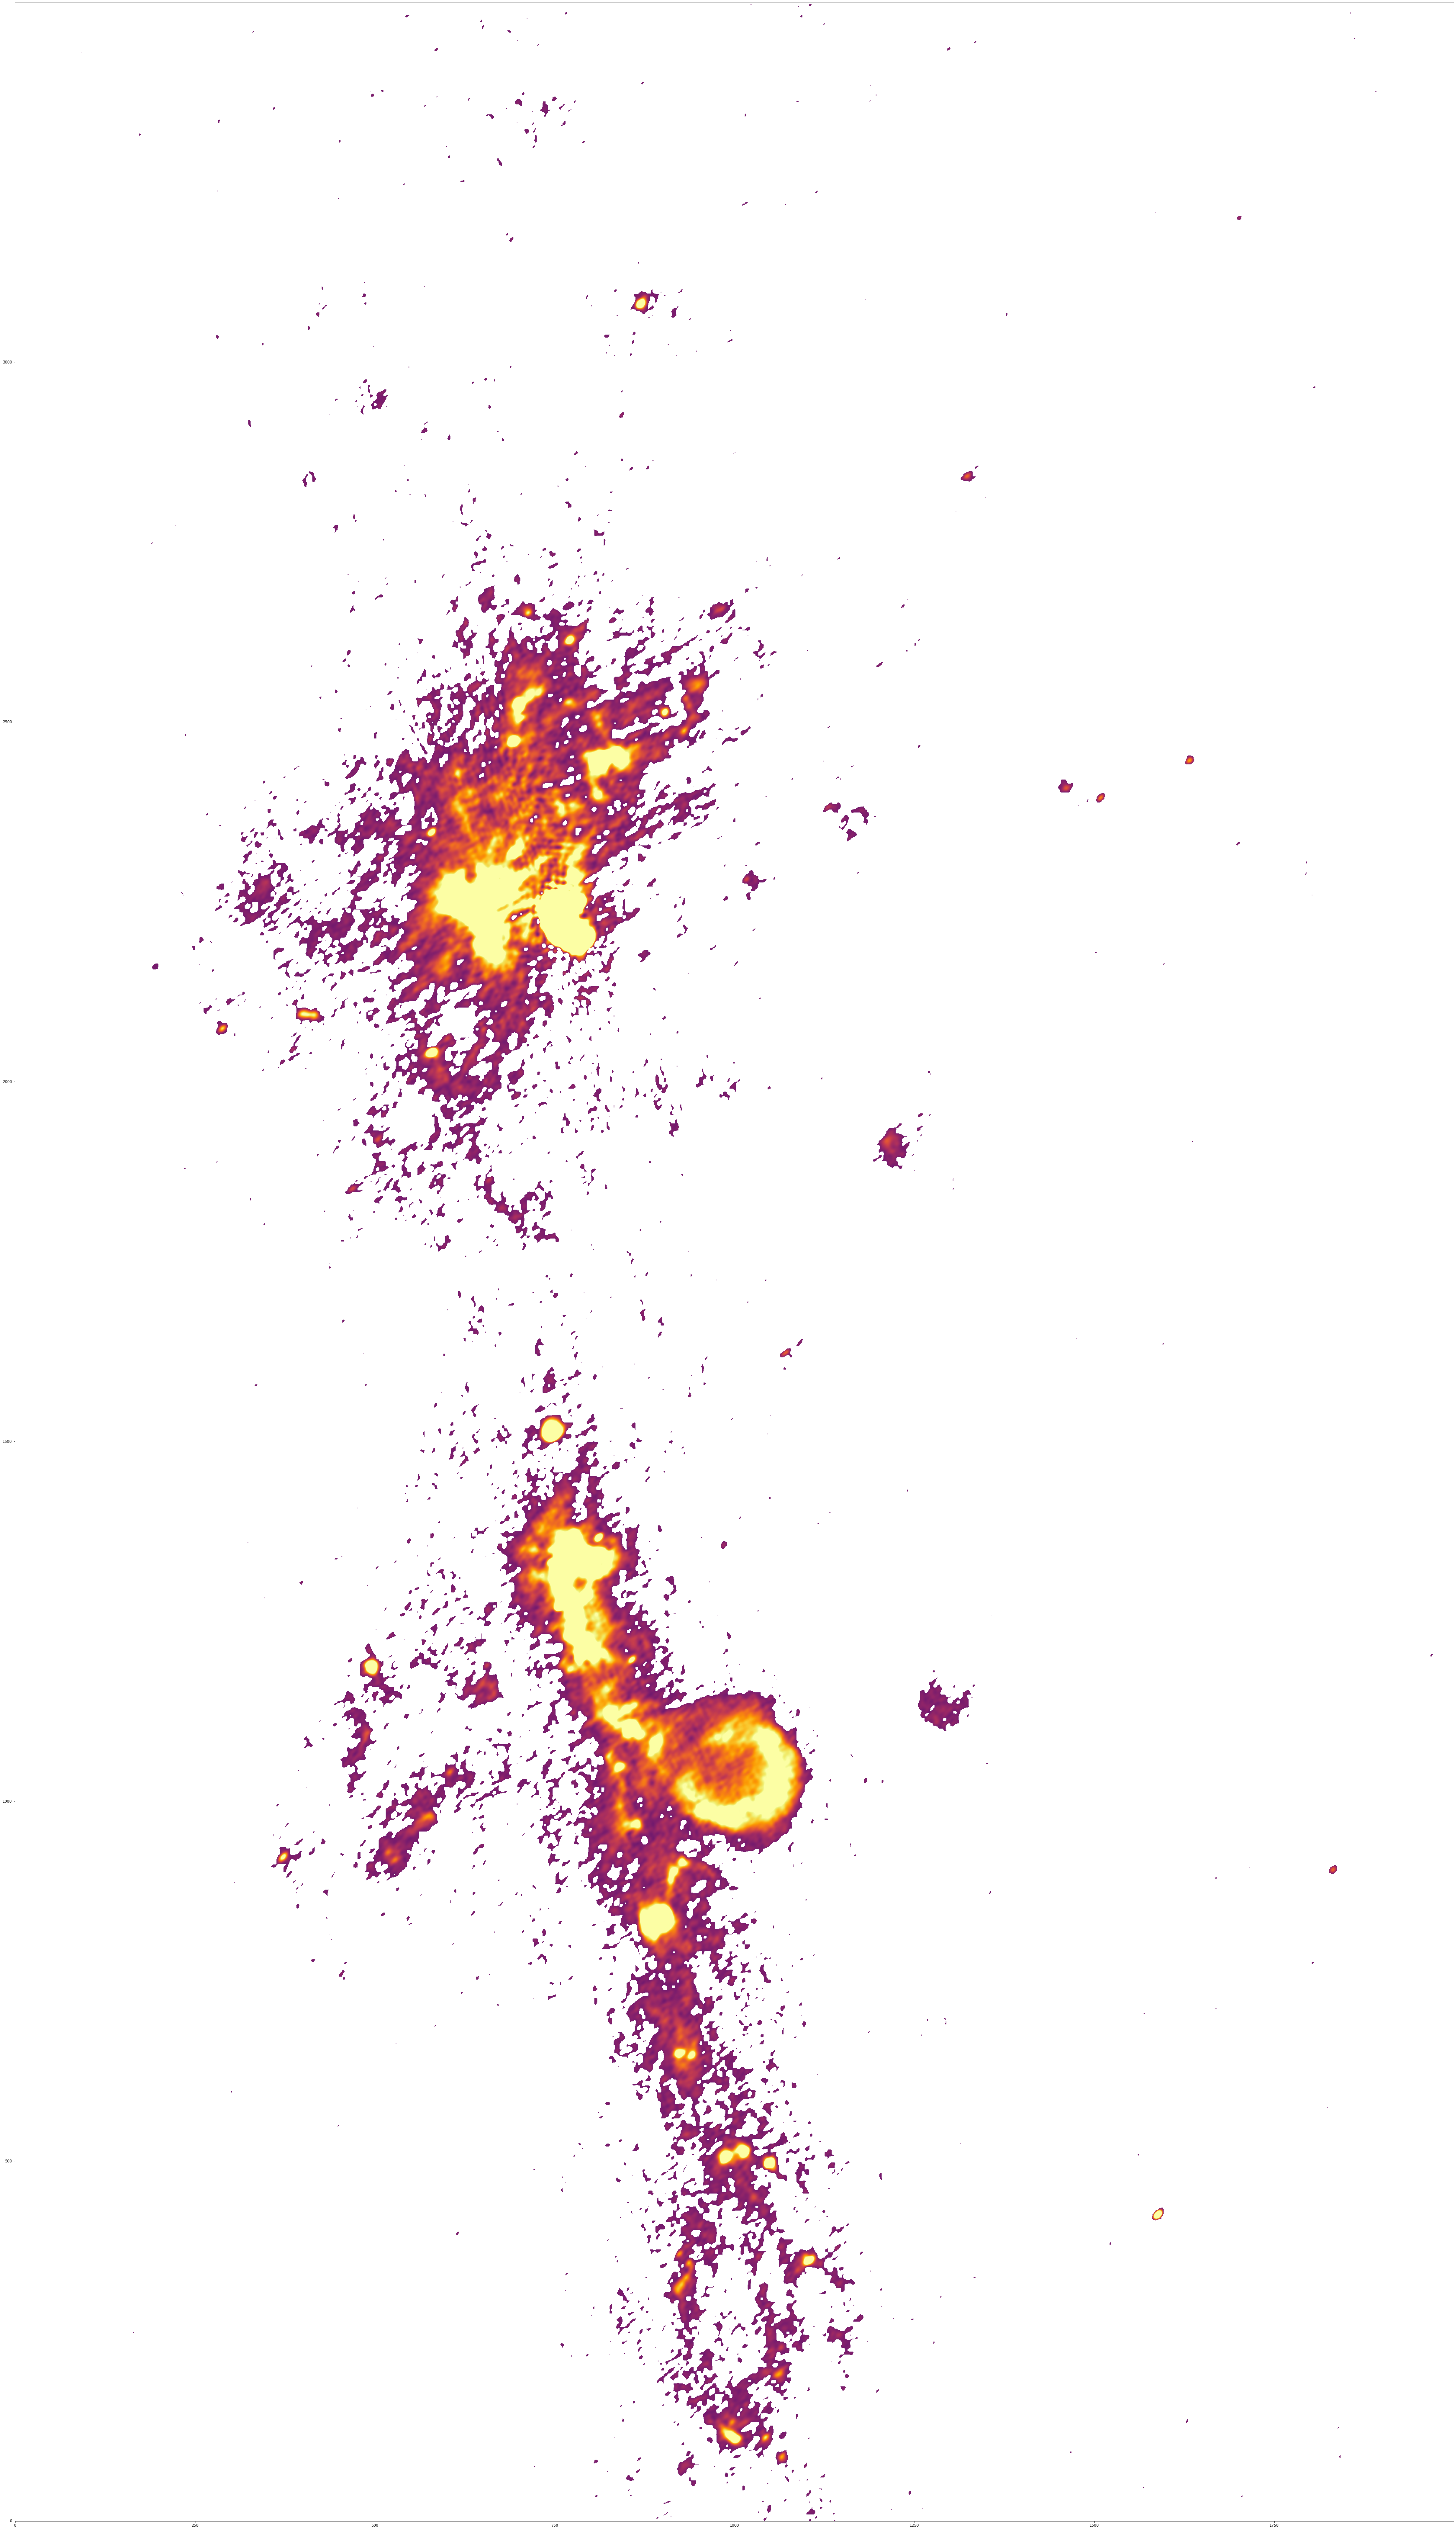

In [30]:
fitsdata_b3_tt0 = fits.open(w51e2_b3_tt0)
imageb3_tt0 = fitsdata_b3_tt0[0].data[0][0]
imageb3_tt0_cut = imageb3_tt0[5000:8500,6500:8500]

fig = plt.figure(figsize=(20*3,35*3))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
plot_masked(ax1,imageb3_tt0_cut,threshold=1.5e-5, vmin = -0.00010907209521789237, vmax=0.00037569526204058964)





[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


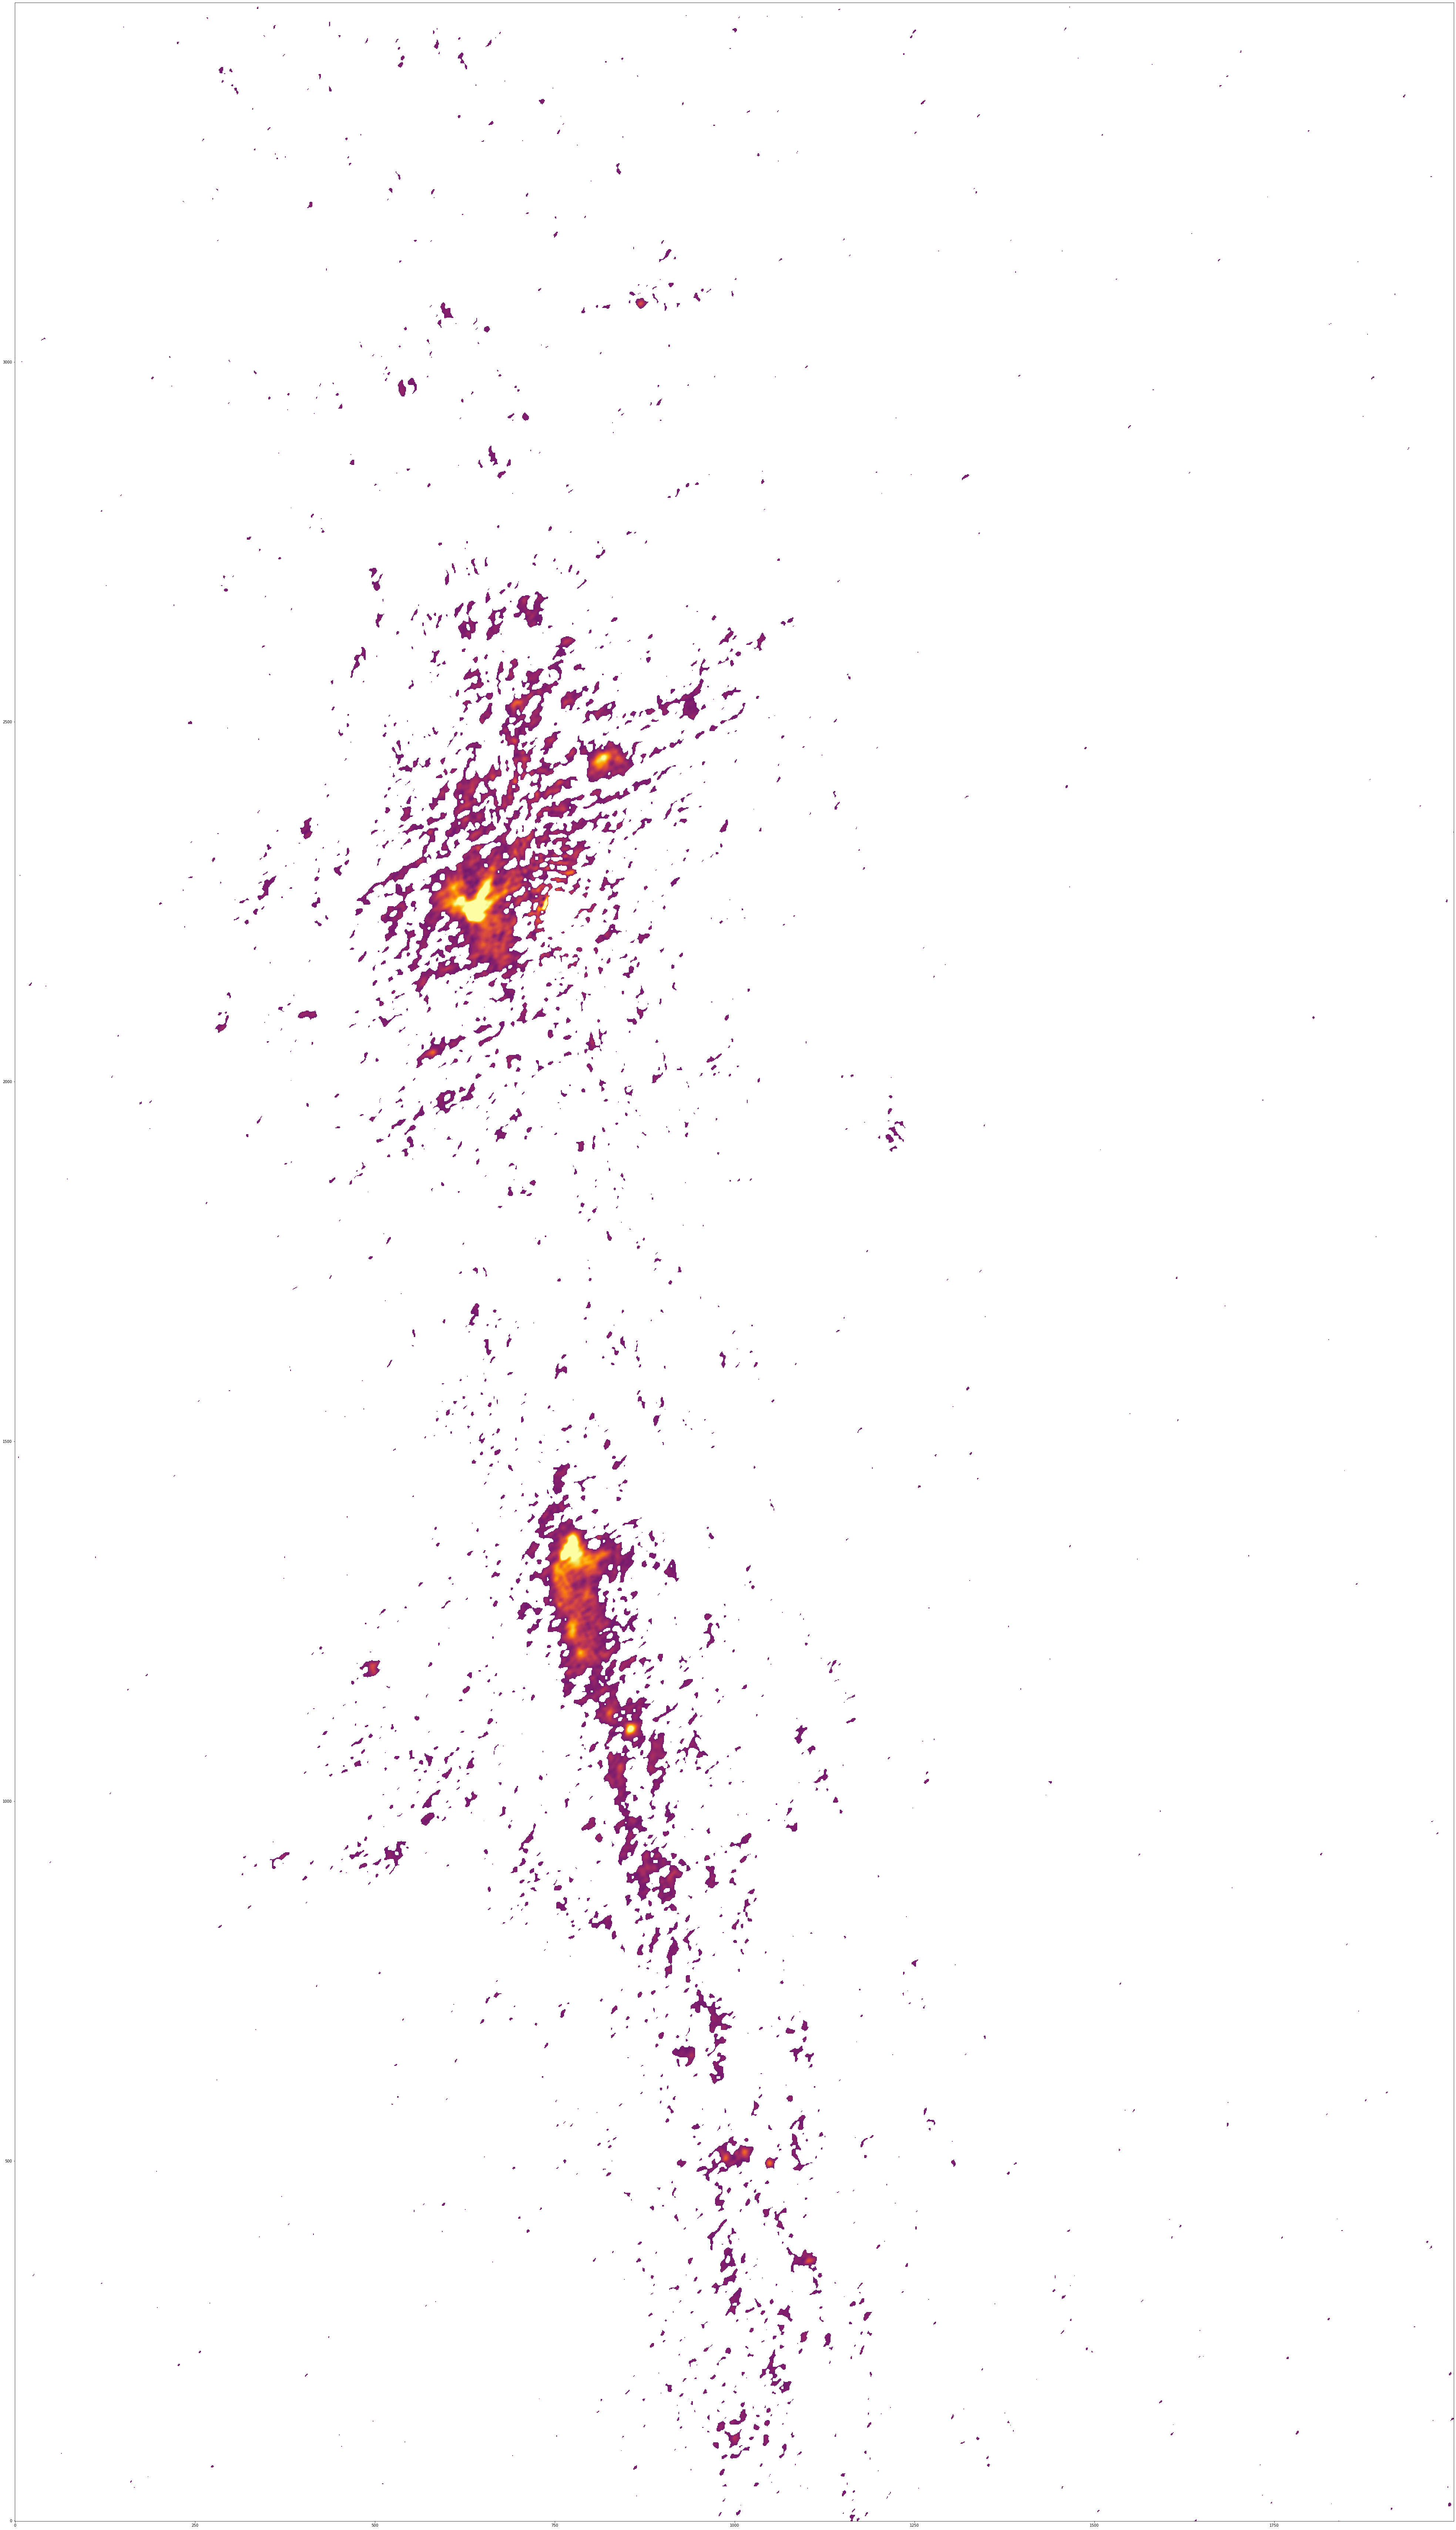

In [31]:
fitsdata_b3_tt1 = fits.open(w51e2_b3_tt1)
imageb3_tt1 = fitsdata_b3_tt1[0].data[0][0]
imageb3_tt1_cut = imageb3_tt1[5000:8500,6500:8500]

fig = plt.figure(figsize=(20*3,35*3))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
plot_masked(ax1,imageb3_tt1_cut,threshold=2e-4, vmin = -0.0016887666024750538, vmax=0.005695596150222675)

In [32]:
def plot_masked2(ax, image1, image2, image3,threshold1=1e-5,threshold2=2e-4,vmin=0,vmax=1e-3,cmap='inferno'):
    mask = np.ma.masked_where(((image1<3*threshold1)|(image2<3*threshold2)),image3)
    ax.imshow(mask, origin='lower', vmin=vmin,vmax=vmax,cmap=plt.get_cmap(cmap))
    return mask
    

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
(3500, 2000)


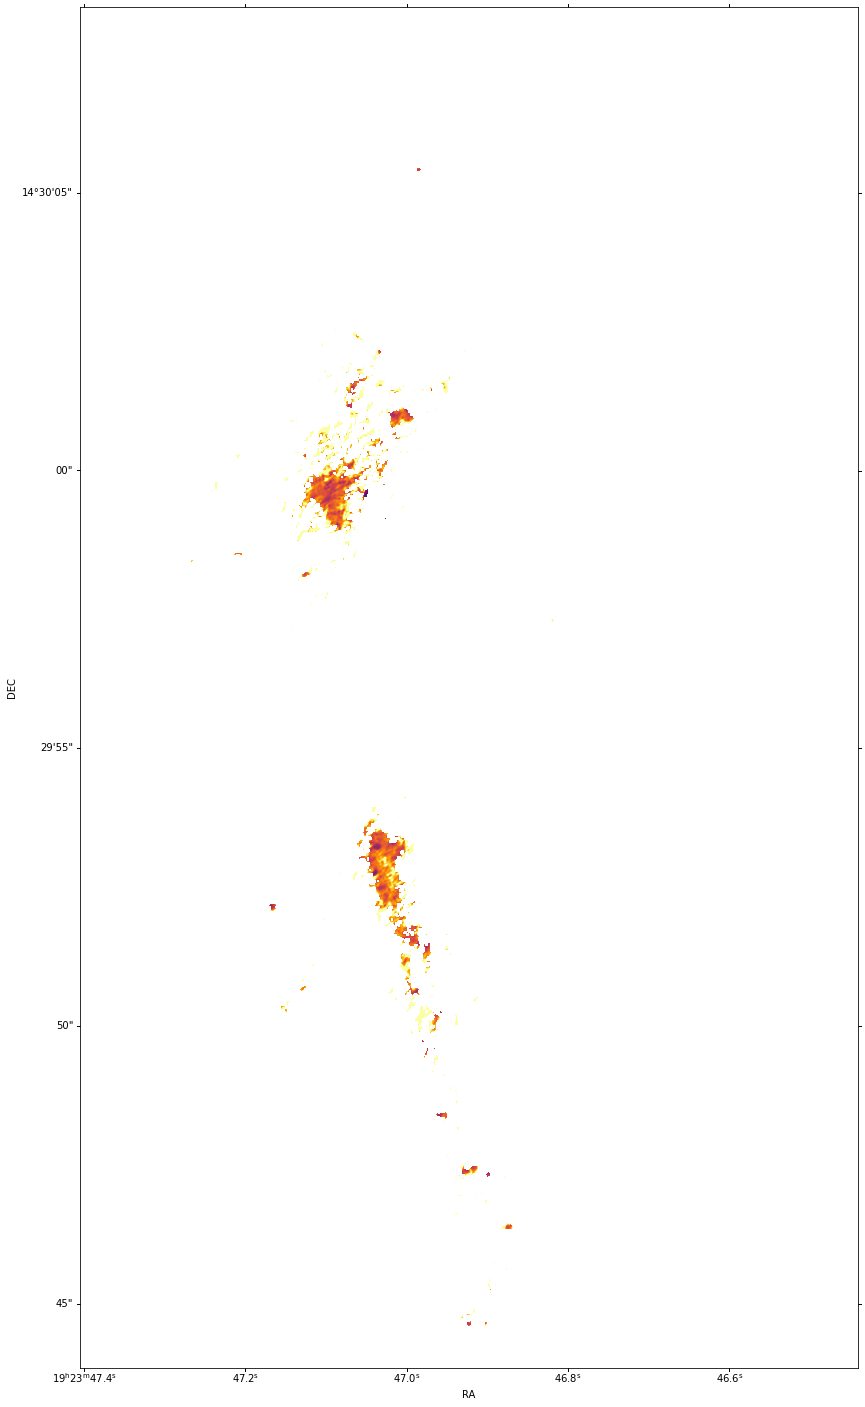

In [33]:
fitsdata_b3_alpha = fits.open(w51e2_b3_alpha)
imageb3_alpha = fitsdata_b3_alpha[0].data[0][0]
imageb3_alpha_cut = imageb3_alpha[5000:8500,6500:8500]
hdrNB3 = fits.getheader(w51e2_b3_tt0)  
wcsNB3 = WCS(hdrNB3,naxis=2)

fig = plt.figure(figsize=(20*0.6,35*0.6))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB3)
alpha_mask = plot_masked2(ax1,imageb3_tt0_cut,imageb3_tt1_cut, imageb3_alpha_cut,threshold1=1.5e-5,threshold2=2e-4,
             vmin = -2, vmax=6)
print(alpha_mask)
print(alpha_mask.shape)
ax1.set_ylabel('DEC')
ax1.set_xlabel('RA')
plt.savefig('w51e2_alpha_from_b3.png')


In [34]:
from astropy.table import Table
from radio_beam import Beam
from dendrocat.aperture import Ellipse
from radio_beam import Beam
from radio_beam import Beams
import astropy.units as u
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
t = Table.read('dendro_table_w51e.fits')
xpeak = t['peak_x_B3']
ypeak = t['peak_y_B3']
alpha2 = t['alpha2']
my_beamNB3 = Beam.from_fits_header(hdrNB3)

def get_alpha(data,peakxy, beam1, wcsNB, num_source):
    fluxarr = []
    cen_world = wcsNB.wcs_pix2world(peakxy,0)

    for i in range(num_source):
       # x_cen = peakxy[i][0]
       # y_cen = peakxy[i][1]
       # cen = (x_cen, y_cen)
        major = beam1.major
        minor = beam1.minor
        pa = beam1.pa
        positions = coordinates.SkyCoord(cen_world[i,0],cen_world[i,1], frame=wcs.utils.wcs_to_celestial_frame(wcsNB).name,unit=(u.deg,u.deg))
        
        cutout = Cutout2D(data, positions, 4.0*major, wcs=wcsNB, mode='partial')


        frame = wcs.utils.wcs_to_celestial_frame(cutout.wcs).name
        aperture = Ellipse(positions, major, minor, pa, unit=u.deg, frame=frame)
        this_mask = aperture.place(cutout.data, wcs=cutout.wcs)
        #pixel_scale_sr = (pixel_scale.value * np.pi/180)**2 # pixel scale in deg^2 -> sr
        print(np.mean(cutout.data[this_mask]))
        fluxarr.append(np.mean(cutout.data[this_mask])) # Jy/beam / (sr/beam) / (pixel/sr) = Jy/ pixel
    return fluxarr



60
3.0629815321702223
2.4345727964889172
2.8245931226153704
1.8413735323174054
2.532521270042242
2.783322356468023
3.108936398528343
2.9348889727925145
2.953976192989865
4.339384896414621
3.6929194132486978
1.8990127208621004
4.582197666168213
3.656556240347929
6.17855978012085
4.049381256103516
1.8129268912381904
2.4778316409088843
3.836924353311228
1.9640211948128634
3.360877264113653
2.779300246127816
2.0303955078125
3.9352257307185683
3.150287716887718
1.2273198504780614
3.7506909037745277
1.877755846296038
4.187758975558811
2.738389303517896
4.433642959594726
3.343720192132994
2.463412972383721
0.09436875343322754
--
1.7585136945857558
--
2.87788586283839
2.120955001476199
2.433943282726199
2.665451404660247
2.6939350763956704
2.2137454720430596
4.105301720755441
2.3164392515670422
--
2.078051722326944
2.8993106221043785
--
4.666804823764535
2.42894287109375
2.446564430414244
2.3892467410065406
2.5621997921965844
3.1216027396065846
3.819134267171224
2.350312166435774
4.31762872740

Text(0, 0.5, 'alpha_from_B3')

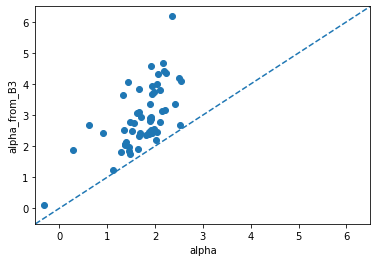

In [35]:
peakxy = np.vstack((xpeak-6500,ypeak-5000))
print(len(xpeak))
alpha_from_b3 = get_alpha(alpha_mask,peakxy.T,my_beamNB3,wcsNB3,len(xpeak))
print(alpha_from_b3)
fig = plt.figure()
print(len(alpha2),len(alpha_from_b3))
plt.scatter(alpha2, alpha_from_b3)
plt.plot(np.linspace(-0.5,6.5,10),np.linspace(-0.5,6.5,10),ls='dashed')
plt.xlim(-0.5,6.5)
plt.ylim(-0.5,6.5)
plt.xlabel('alpha')
plt.ylabel('alpha_from_B3')


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


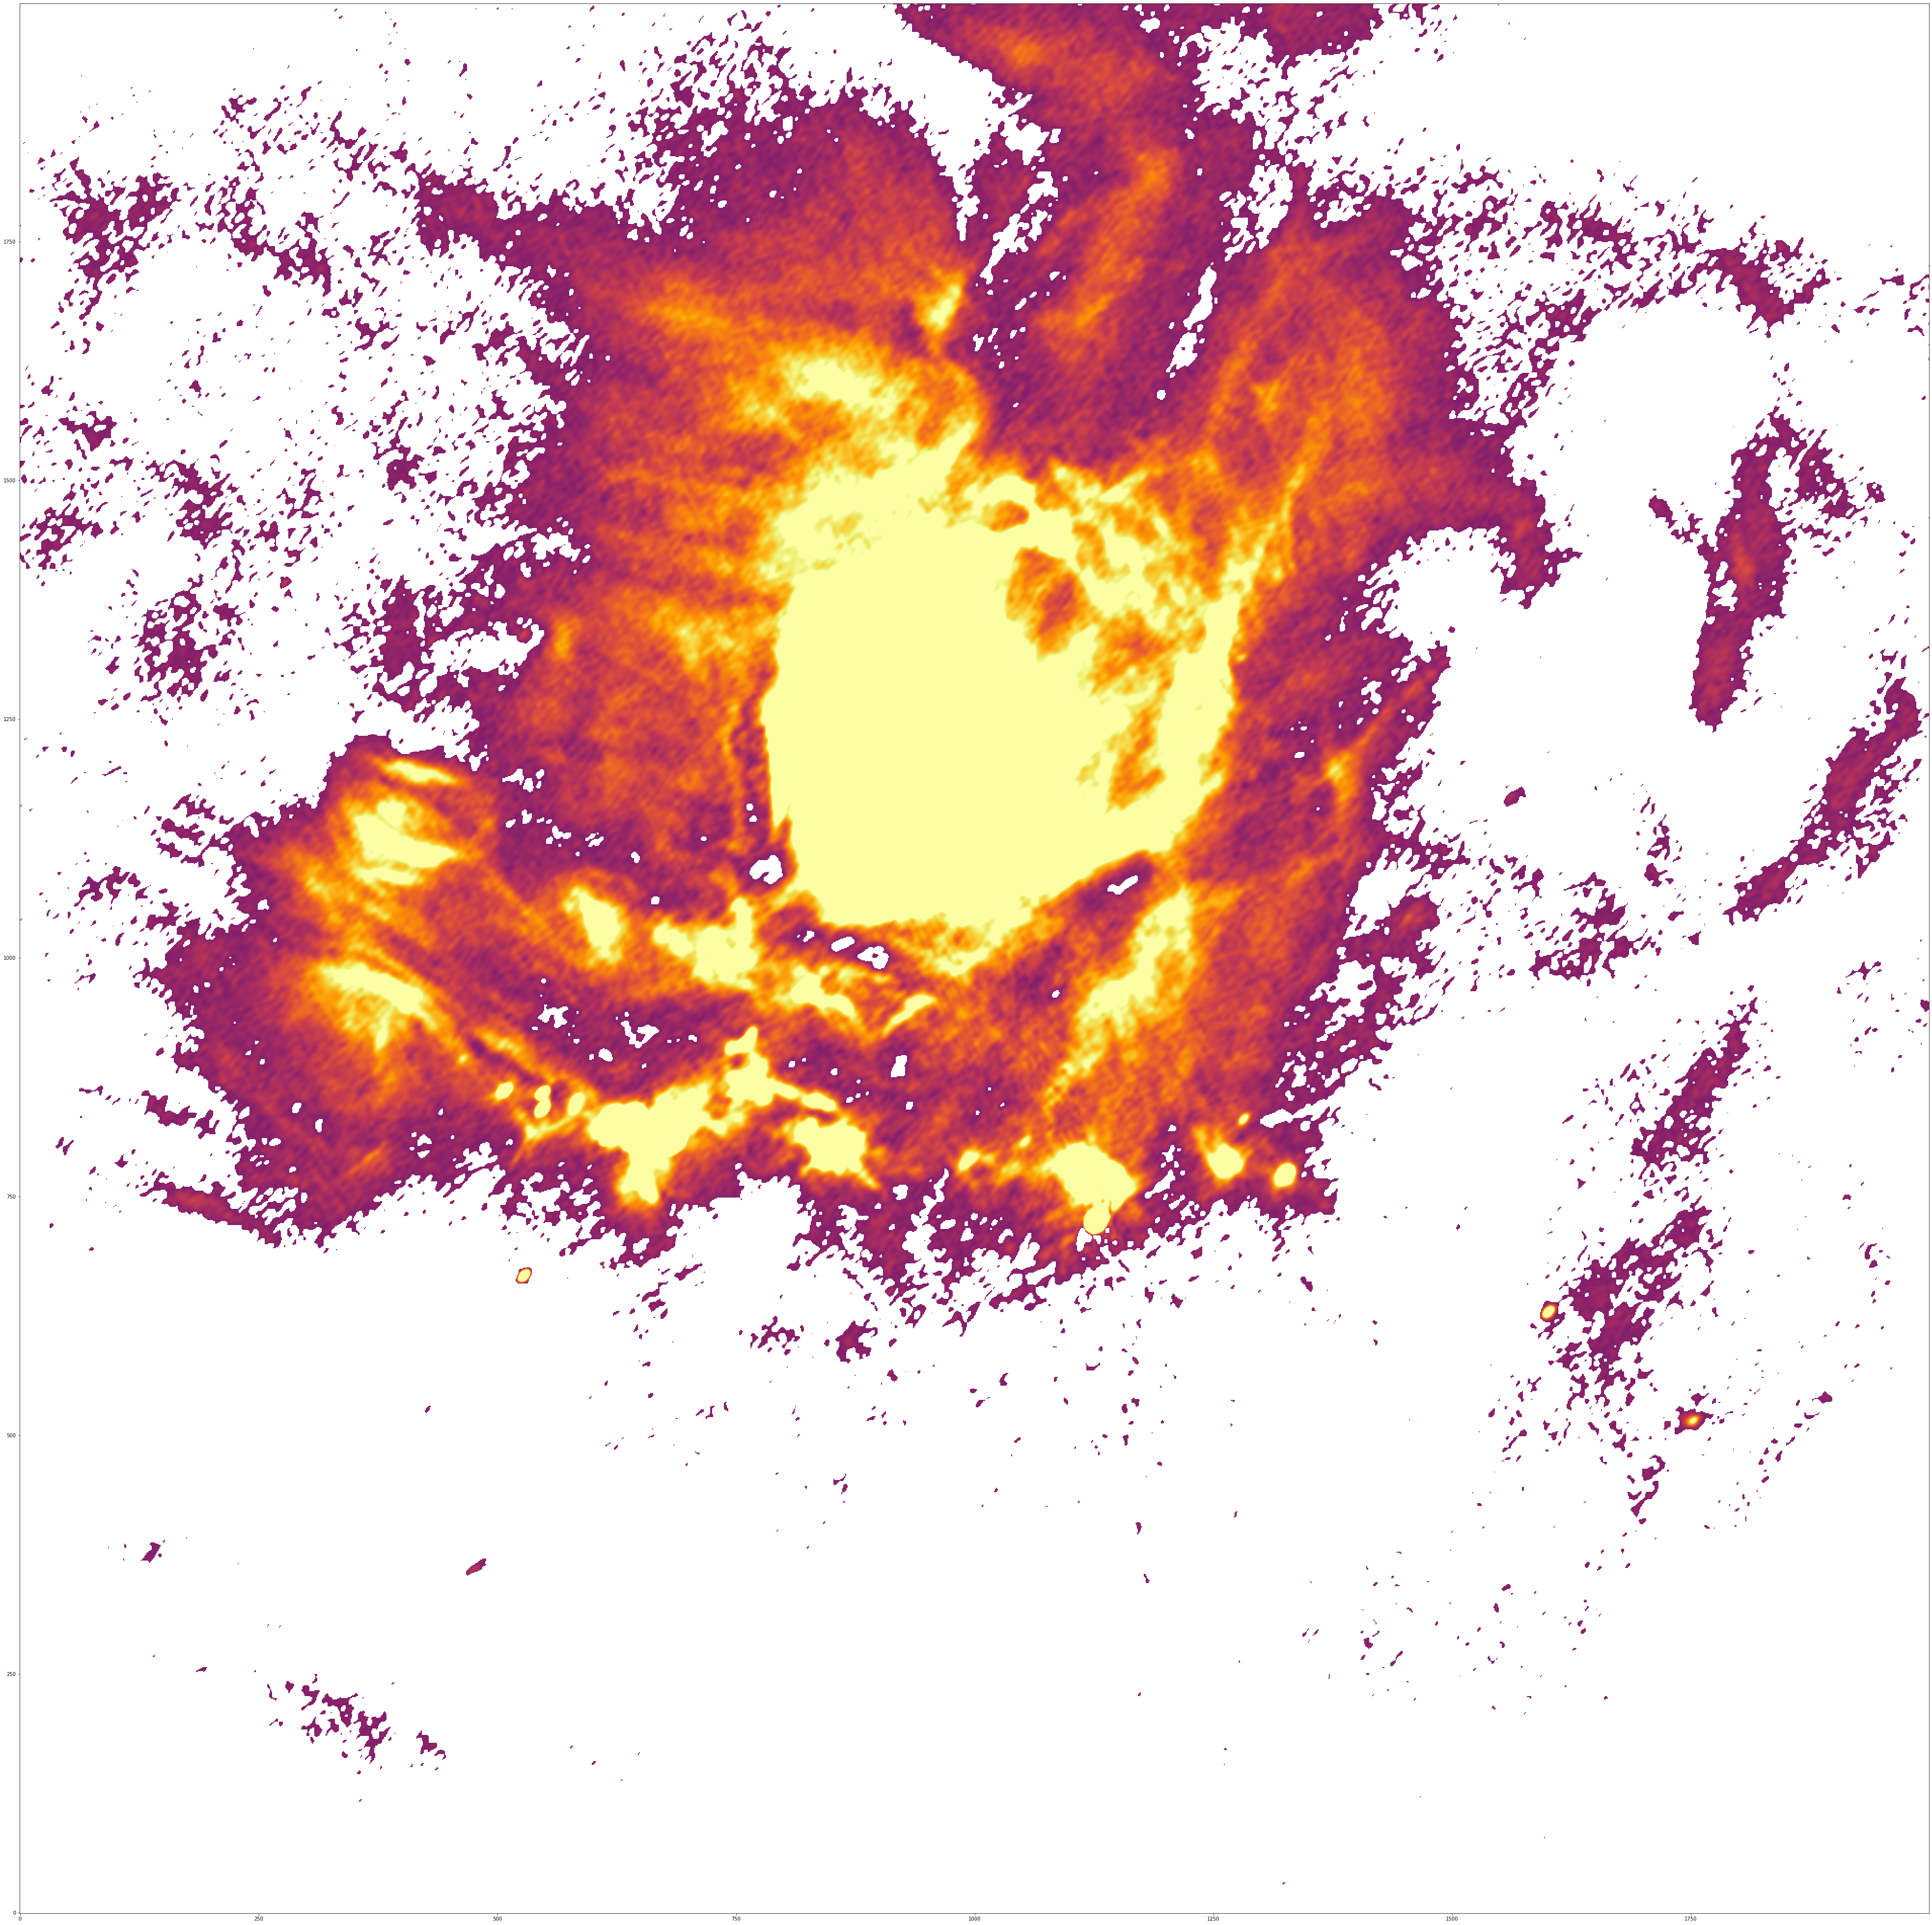

In [38]:

fitsdata_b3_tt0 = fits.open(w51n_b3_tt0)
imageb3_tt0 = fitsdata_b3_tt0[0].data[0][0]
imageb3_tt0_cut = imageb3_tt0[6500:8500,6500:8500]

fig = plt.figure(figsize=(20*3,35*3))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
plot_masked(ax1,imageb3_tt0_cut,threshold=2e-5, vmin = -0.00010907209521789237, vmax=0.00037569526204058964)







[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


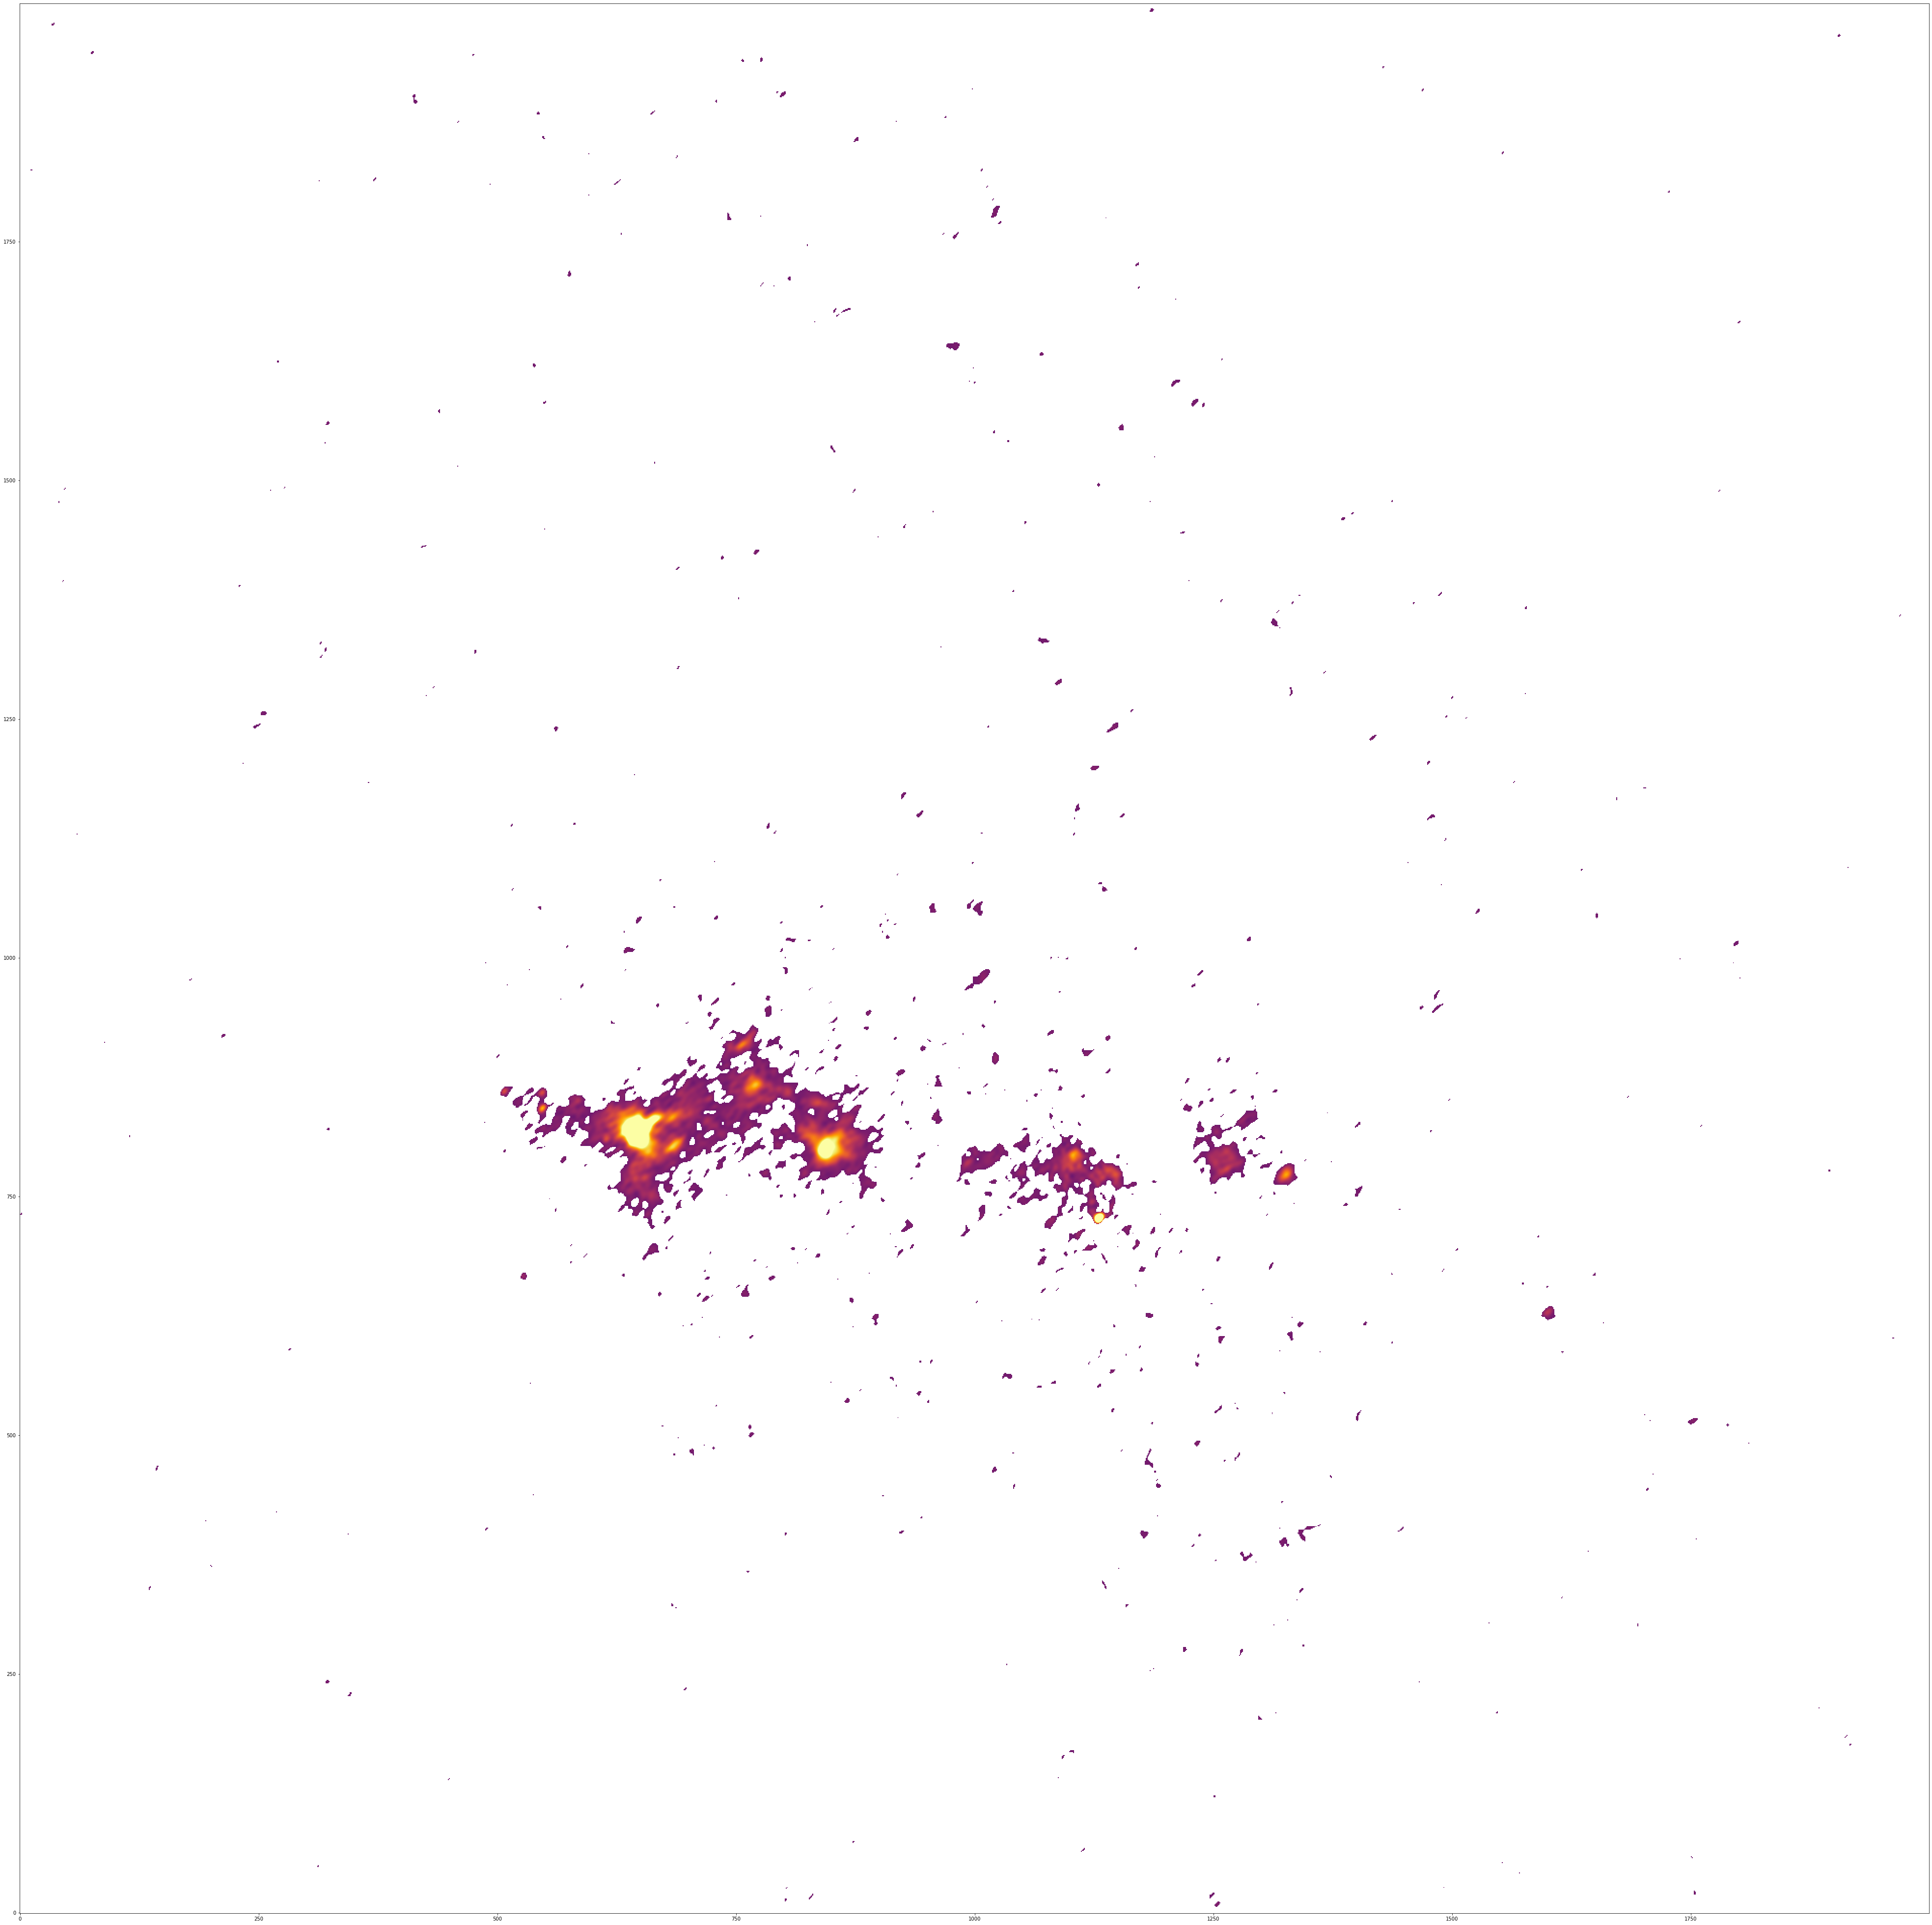

In [39]:
fitsdata_b3_tt1 = fits.open(w51n_b3_tt1)
imageb3_tt1 = fitsdata_b3_tt1[0].data[0][0]
imageb3_tt1_cut = imageb3_tt1[6500:8500,6500:8500]

fig = plt.figure(figsize=(20*3,35*3))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
plot_masked(ax1,imageb3_tt1_cut,threshold=2e-4, vmin = -0.0016887666024750538, vmax=0.005695596150222675)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
(2000, 2000)


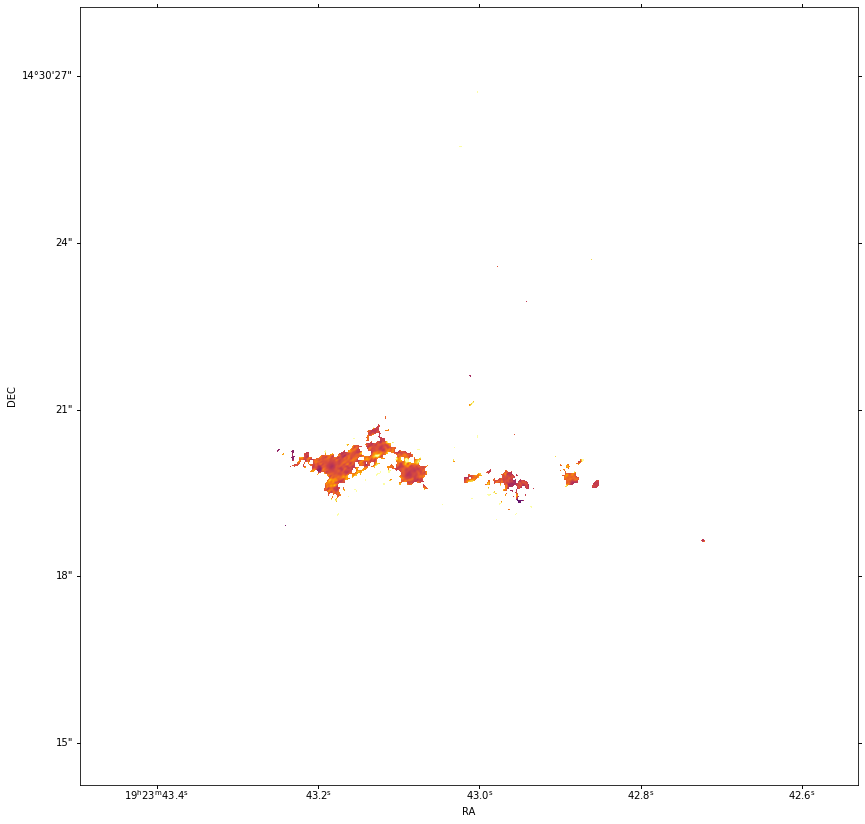

In [40]:
fitsdata_b3_alpha = fits.open(w51n_b3_alpha)
imageb3_alpha = fitsdata_b3_alpha[0].data[0][0]
imageb3_alpha_cut = imageb3_alpha[6500:8500,6500:8500]
hdrNB3 = fits.getheader(w51n_b3_tt0)  
wcsNB3 = WCS(hdrNB3,naxis=2)

fig = plt.figure(figsize=(20*0.6,35*0.6))
ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB3)
alpha_mask = plot_masked2(ax1,imageb3_tt0_cut,imageb3_tt1_cut, imageb3_alpha_cut,threshold1=2e-5,threshold2=2e-4,
             vmin = -2, vmax=6)
print(alpha_mask)
print(alpha_mask.shape)
ax1.set_ylabel('DEC')
ax1.set_xlabel('RA')
plt.savefig('w51n_alpha_from_b3.png')


22
2.3506522042410714
2.0883340170217113
0.801320145769817
0.24434932442598564
2.225570856138717
2.0926710616710573
2.0370392910269803
2.625047018361646
2.384174258209938
2.4850531289743825
1.8635621181754178
2.2462615966796875
2.2833842787631724
2.402513016101926
2.4147442408970425
3.1984888121139172
1.0912587365438773
3.5146810842114826
1.0814899262927828
2.190512546273165
1.0386938937874728
2.147886586743732
[2.3506522042410714, 2.0883340170217113, 0.801320145769817, 0.24434932442598564, 2.225570856138717, 2.0926710616710573, 2.0370392910269803, 2.625047018361646, 2.384174258209938, 2.4850531289743825, 1.8635621181754178, 2.2462615966796875, 2.2833842787631724, 2.402513016101926, 2.4147442408970425, 3.1984888121139172, 1.0912587365438773, 3.5146810842114826, 1.0814899262927828, 2.190512546273165, 1.0386938937874728, 2.147886586743732]
22 22


Text(0, 0.5, 'alpha_from_B3')

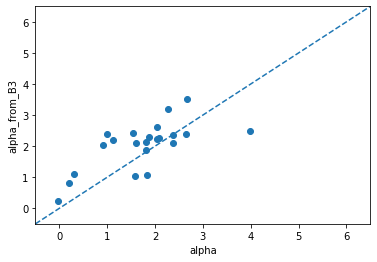

In [41]:
t = Table.read('dendro_table_w51n.fits')
xpeak = t['peak_x_B3']
ypeak = t['peak_y_B3']
alpha2 = t['alpha2']
my_beamNB3 = Beam.from_fits_header(hdrNB3)
peakxy = np.vstack((xpeak-6500,ypeak-6500))
print(len(xpeak))
alpha_from_b3 = get_alpha(alpha_mask,peakxy.T,my_beamNB3,wcsNB3,len(xpeak))
print(alpha_from_b3)
fig = plt.figure()
print(len(alpha2),len(alpha_from_b3))
plt.scatter(alpha2, alpha_from_b3)
plt.plot(np.linspace(-0.5,6.5,10),np.linspace(-0.5,6.5,10),ls='dashed')
plt.xlim(-0.5,6.5)
plt.ylim(-0.5,6.5)
plt.xlabel('alpha')
plt.ylabel('alpha_from_B3')